In [39]:
# Базовые библиотеки
import numpy as np
import pandas as pd

# Воспроизводимость
RANDOM_STATE = 42

# Библиотеки sklearn для данных, моделей, разбиения и метрик
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot as plt
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    classification_report,
    RocCurveDisplay,
    PrecisionRecallDisplay,
    brier_score_loss,
)

# Для калибровки
from sklearn.calibration import CalibratedClassifierCV
df = pd.read_csv('S05-hw-dataset.csv')

In [40]:
df.head(5)

,client_id,age,income,years_employed,credit_score,debt_to_income,num_credit_cards,num_late_payments,has_mortgage,has_car_loan,savings_balance,checking_balance,region_risk_score,phone_calls_to_support_last_3m,active_loans,customer_tenure_years,default
0,1,25,94074,22,839,0.547339,1,7,0,0,26057,5229,0.080052,19,1,8,0
1,2,58,51884,26,565,0.290882,1,1,0,1,16221,11595,0.428311,15,0,7,0
2,3,53,48656,39,561,0.522340,1,13,0,0,55448,-2947,0.770883,15,4,5,0
3,4,42,81492,30,582,0.709123,2,10,1,1,35188,17727,0.357619,0,2,7,1
4,5,42,94713,8,642,0.793392,3,3,0,0,0,-404,0.414260,17,1,10,1


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   client_id                       3000 non-null   int64  
 1   age                             3000 non-null   int64  
 2   income                          3000 non-null   int64  
 3   years_employed                  3000 non-null   int64  
 4   credit_score                    3000 non-null   int64  
 5   debt_to_income                  3000 non-null   float64
 6   num_credit_cards                3000 non-null   int64  
 7   num_late_payments               3000 non-null   int64  
 8   has_mortgage                    3000 non-null   int64  
 9   has_car_loan                    3000 non-null   int64  
 10  savings_balance                 3000 non-null   int64  
 11  checking_balance                3000 non-null   int64  
 12  region_risk_score               30

In [42]:
df.describe()

,client_id,age,income,years_employed,credit_score,debt_to_income,num_credit_cards,num_late_payments,has_mortgage,has_car_loan,savings_balance,checking_balance,region_risk_score,phone_calls_to_support_last_3m,active_loans,customer_tenure_years,default
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,1500.500000,45.059667,69658.992000,19.577667,649.285333,0.284065,3.494667,6.869333,0.495000,0.501333,20607.256667,5559.684333,0.400175,9.524667,1.976333,6.968667,0.410333
std,866.169729,14.192883,24742.235182,11.381497,69.955852,0.161112,2.289917,4.291278,0.500058,0.500082,14035.209739,6306.032612,0.204529,5.779030,1.408700,4.349942,0.491976
min,1.000000,21.000000,15000.000000,0.000000,402.000000,0.006147,0.000000,0.000000,0.000000,0.000000,0.000000,-3000.000000,0.001148,0.000000,0.000000,0.000000,0.000000
25%,750.750000,33.000000,52641.750000,10.000000,604.000000,0.157796,1.000000,3.000000,0.000000,0.000000,9612.250000,341.500000,0.239208,5.000000,1.000000,3.000000,0.000000
50%,1500.500000,45.000000,69784.500000,20.000000,647.000000,0.261726,3.000000,7.000000,0.000000,1.000000,20021.000000,5114.500000,0.381992,10.000000,2.000000,7.000000,0.000000
75%,2250.250000,57.000000,85874.250000,29.000000,697.000000,0.388886,6.000000,10.000000,1.000000,1.000000,30101.250000,9906.250000,0.549213,15.000000,3.000000,11.000000,1.000000
max,3000.000000,69.000000,156351.000000,39.000000,850.000000,0.878343,7.000000,14.000000,1.000000,1.000000,75237.000000,29335.000000,0.961733,19.000000,4.000000,14.000000,1.000000


In [43]:
print(df['default'].value_counts(normalize=True))

default
0    0.589667
1    0.410333
Name: proportion, dtype: float64


In [44]:
#пропусков нет, распределение таргетов 0 - 0.59, 1 - 0.41, все используемые признаки - числовые.
y = df['default']
drops = ['default','client_id']
x = df.drop(columns=drops, axis =1)
x_temp, x_test, y_temp, y_test = train_test_split(
    x,
    y,
    test_size = 0.2,
    stratify=y,
    random_state=42
)
x_train, x_val, y_train, y_val = train_test_split(
    x_temp,
    y_temp,
    test_size = 0.25,
    stratify=y_temp,
    random_state=42
)

print("Размеры выборок:")
print("  train:", x_train.shape)
print("  val:  ", x_val.shape)
print("  test: ", x_test.shape)

print("\nРаспределение классов (train):")
print(y_train.value_counts(normalize=True))

print("\nРаспределение классов (val):")
print(y_val.value_counts(normalize=True))

print("\nРаспределение классов (test):")
print(y_test.value_counts(normalize=True))

Размеры выборок:
  train: (1800, 15)
  val:   (600, 15)
  test:  (600, 15)

Распределение классов (train):
default
0    0.589444
1    0.410556
Name: proportion, dtype: float64

Распределение классов (val):
default
0    0.59
1    0.41
Name: proportion, dtype: float64

Распределение классов (test):
default
0    0.59
1    0.41
Name: proportion, dtype: float64


In [45]:
baseline = DummyClassifier(strategy="most_frequent", random_state=42)
baseline.fit(x_train,y_train)
y_val_pred_baseline = baseline.predict(x_val)
y_val_proba_baseline = baseline.predict_proba(x_val)[:,1]

print("=== Бейзлайн (DummyClassifier, most_frequent) – качество на validation ===")
print("Accuracy :", accuracy_score(y_val, y_val_pred_baseline))
print("Precision:", precision_score(y_val, y_val_pred_baseline,pos_label=0, zero_division=0))
print("Recall   :", recall_score(y_val, y_val_pred_baseline,pos_label=0, zero_division=0))
print("F1-score :", f1_score(y_val, y_val_pred_baseline, pos_label=0,zero_division=0))

# Для ROC-AUC нам нужны вероятности положительного класса
try:
    print("ROC-AUC  :", roc_auc_score(y_val, y_val_proba_baseline))
except ValueError as e:
    print("Не удалось посчитать ROC-AUC для бейзлайна:", e)

=== Бейзлайн (DummyClassifier, most_frequent) – качество на validation ===
Accuracy : 0.59
Precision: 0.59
Recall   : 1.0
F1-score : 0.7421383647798742
ROC-AUC  : 0.5


In [46]:
log_reg_pipeline = Pipeline(
    steps = [
        ("scaler", StandardScaler()),
        (
            "logreg",
                LogisticRegression(
                    penalty="l2",
                    C = 0.1,
                    solver="liblinear",
                    random_state=42,
                ),
        ),
    ]
)
log_reg_pipeline.fit(x_train,y_train)
y_val_pred = log_reg_pipeline.predict(x_val)
y_val_proba = log_reg_pipeline.predict_proba(x_val)[:,1]
print("=== Логистическая регрессия (C=1.0) – качество на validation ===")
print("Accuracy :", accuracy_score(y_val, y_val_pred))
print("Precision:", precision_score(y_val, y_val_pred, zero_division=0))
print("Recall   :", recall_score(y_val, y_val_pred, zero_division=0))
print("F1-score :", f1_score(y_val, y_val_pred, zero_division=0))
print("ROC-AUC  :", roc_auc_score(y_val, y_val_proba))
target_names = ['Non-Default', 'Default']
print("\nПодробный отчёт по классам (classification_report):")
print(classification_report(y_val, y_val_pred, target_names=target_names))

=== Логистическая регрессия (C=1.0) – качество на validation ===
Accuracy : 0.815
Precision: 0.8497409326424871
Recall   : 0.6666666666666666
F1-score : 0.7471526195899773
ROC-AUC  : 0.8746842129438244

Подробный отчёт по классам (classification_report):
              precision    recall  f1-score   support

 Non-Default       0.80      0.92      0.85       354
     Default       0.85      0.67      0.75       246

    accuracy                           0.81       600
   macro avg       0.82      0.79      0.80       600
weighted avg       0.82      0.81      0.81       600



c:\Users\rasli\test\DPO_III\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1135: FutureWarning: 'penalty' was deprecated in version 1.8 and will be removed in 1.10. To avoid this warning, leave 'penalty' set to its default value and use 'l1_ratio' or 'C' instead. Use l1_ratio=0 instead of penalty='l2', l1_ratio=1 instead of penalty='l1', and C=np.inf instead of penalty=None.
  warnings.warn(


In [47]:
#Подбор гиперпараметра C 
param_grid = {
    "logreg__C": [0.001,0.01,0.1,0.5,1,2,4,8,10]
}

grid_search_roc_auc = GridSearchCV(
    estimator=log_reg_pipeline,
    param_grid=param_grid,
    scoring = "roc_auc",
    cv=5,
    n_jobs=-1,
    verbose=1,
)

grid_search_accuracy = GridSearchCV(
    estimator=log_reg_pipeline,
    param_grid=param_grid,
    scoring = "accuracy",
    cv=5,
    n_jobs=-1,
    verbose=1,
)

grid_search_recall = GridSearchCV(
    estimator=log_reg_pipeline,
    param_grid=param_grid,
    scoring = "recall",
    cv=5,
    n_jobs=-1,
    verbose=1,
)

grid_search_roc_auc.fit(x_train,y_train)
grid_search_accuracy.fit(x_train,y_train)
grid_search_recall.fit(x_train,y_train)

print("Лучшие параметры по roc_auc:", grid_search_roc_auc.best_params_)
print("Лучшие параметры по accuracy:", grid_search_accuracy.best_params_)
print("Лучшие параметры по recall:", grid_search_recall.best_params_)
print("Лучший ROC-AUC (по CV):", grid_search_roc_auc.best_score_)
print("Лучший accuracu (по CV):", grid_search_accuracy.best_score_)
print("Лучший recall (по CV):", grid_search_recall.best_score_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
Fitting 5 folds for each of 9 candidates, totalling 45 fits
Fitting 5 folds for each of 9 candidates, totalling 45 fits
Лучшие параметры по roc_auc: {'logreg__C': 0.1}
Лучшие параметры по accuracy: {'logreg__C': 0.1}
Лучшие параметры по recall: {'logreg__C': 0.1}
Лучший ROC-AUC (по CV): 0.8535885101695057
Лучший accuracu (по CV): 0.7816666666666666
Лучший recall (по CV): 0.6888030888030888


c:\Users\rasli\test\DPO_III\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1135: FutureWarning: 'penalty' was deprecated in version 1.8 and will be removed in 1.10. To avoid this warning, leave 'penalty' set to its default value and use 'l1_ratio' or 'C' instead. Use l1_ratio=0 instead of penalty='l2', l1_ratio=1 instead of penalty='l1', and C=np.inf instead of penalty=None.
  warnings.warn(
c:\Users\rasli\test\DPO_III\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1135: FutureWarning: 'penalty' was deprecated in version 1.8 and will be removed in 1.10. To avoid this warning, leave 'penalty' set to its default value and use 'l1_ratio' or 'C' instead. Use l1_ratio=0 instead of penalty='l2', l1_ratio=1 instead of penalty='l1', and C=np.inf instead of penalty=None.
  warnings.warn(
c:\Users\rasli\test\DPO_III\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1135: FutureWarning: 'penalty' was deprecated in version 1.8 and will be removed in 1.10. To avoid thi

In [48]:
best=grid_search_recall.best_estimator_
y_val_pred_best = best.predict(x_val)
y_val_proba_best = best.predict_proba(x_val)[:, 1]
print("=== Лучшая модель – качество на validation ===")
print("Accuracy :", accuracy_score(y_val, y_val_pred_best))
print("Precision:", precision_score(y_val, y_val_pred_best, zero_division=0))
print("Recall   :", recall_score(y_val, y_val_pred_best, zero_division=0))
print("F1-score :", f1_score(y_val, y_val_pred_best, zero_division=0))
print("ROC-AUC  :", roc_auc_score(y_val, y_val_proba_best))

# Оцениваем на test
y_test_pred = best.predict(x_test)
y_test_proba = best.predict_proba(x_test)[:, 1]

print("\n=== Лучшая модель – качество на test ===")
print("Accuracy :", accuracy_score(y_test, y_test_pred))
print("Precision:", precision_score(y_test, y_test_pred, zero_division=0))
print("Recall   :", recall_score(y_test, y_test_pred, zero_division=0))
print("F1-score :", f1_score(y_test, y_test_pred, zero_division=0))
print("ROC-AUC  :", roc_auc_score(y_test, y_test_proba))

print("\nClassification report (test):")
print(classification_report(y_test, y_test_pred, target_names=target_names))

=== Лучшая модель – качество на validation ===
Accuracy : 0.815
Precision: 0.8497409326424871
Recall   : 0.6666666666666666
F1-score : 0.7471526195899773
ROC-AUC  : 0.8746842129438244

=== Лучшая модель – качество на test ===
Accuracy : 0.805
Precision: 0.8056872037914692
Recall   : 0.6910569105691057
F1-score : 0.7439824945295405
ROC-AUC  : 0.8749598089201231

Classification report (test):
              precision    recall  f1-score   support

 Non-Default       0.80      0.88      0.84       354
     Default       0.81      0.69      0.74       246

    accuracy                           0.81       600
   macro avg       0.81      0.79      0.79       600
weighted avg       0.81      0.81      0.80       600



<function matplotlib.pyplot.close(fig: "None | int | str | Figure | Literal['all']" = None) -> 'None'>

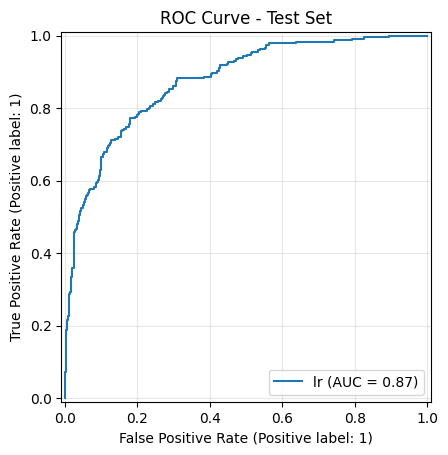

In [49]:
roc_display = RocCurveDisplay.from_predictions(
    y_test,
    y_test_proba,
    name="lr"
)

roc_display.ax_.set_title("ROC Curve - Test Set")
roc_display.ax_.grid(True, alpha=0.3)
roc_display.ax_.legend(loc="lower right")

plt.savefig('./figures/roc_curve_test.png',
            dpi=300,                
           bbox_inches='tight')

plt.close

In [50]:
results_data = []

# Baseline результаты
results_data.append({
    'Model': 'Baseline (Dummy)',
    'C': '-',
    'Accuracy': accuracy_score(y_val, y_val_pred_baseline),
    'Precision (Default)': precision_score(y_val, y_val_pred_baseline,pos_label=0, zero_division=0),
    'Recall (Default)': recall_score(y_val, y_val_pred_baseline,pos_label=0, zero_division=0),
    'F1 (Default)': f1_score(y_val, y_val_pred_baseline,pos_label=0, zero_division=0),
    'ROC-AUC': roc_auc_score(y_val, y_val_proba_baseline) if hasattr(baseline, 'predict_proba') else 0.5
})

# Logistic Regression с C=1.0
results_data.append({
    'Model': 'Logistic Regression',
    'C': 0.1,
    'Accuracy': accuracy_score(y_val, y_val_pred),
    'Precision (Default)': precision_score(y_val, y_val_pred, zero_division=0),
    'Recall (Default)': recall_score(y_val, y_val_pred, zero_division=0),
    'F1 (Default)': f1_score(y_val, y_val_pred, zero_division=0),
    'ROC-AUC': roc_auc_score(y_val, y_val_proba)
})

results_df = pd.DataFrame(results_data)
print("="*80)
print("СРАВНЕНИЕ МОДЕЛЕЙ НА VALIDATION SET")
print("="*80)
print(results_df.to_string(index=False))

СРАВНЕНИЕ МОДЕЛЕЙ НА VALIDATION SET
              Model    C  Accuracy  Precision (Default)  Recall (Default)  F1 (Default)  ROC-AUC
   Baseline (Dummy)    -     0.590             0.590000          1.000000      0.742138 0.500000
Logistic Regression  0.1     0.815             0.849741          0.666667      0.747153 0.874684


In [52]:
base_clf = Pipeline(
    steps=[
        ("scaler", StandardScaler()),
        (
            "logreg",
            LogisticRegression(
                penalty="l2",
                C=0.1,            
                solver="liblinear",
                random_state=RANDOM_STATE,
            ),
        ),
    ]
)

# Обучаем базовую модель на train, чтобы оценить качество ДО калибровки
base_clf.fit(x_train, y_train)

y_val_proba_base = base_clf.predict_proba(x_val)[:, 1]
brier_before = brier_score_loss(y_val, y_val_proba_base)
print("Brier score до калибровки:", brier_before)

# 2. Оборачиваем тот же самый pipeline в CalibratedClassifierCV
calibrated_clf = CalibratedClassifierCV(
    estimator=base_clf,
    method="sigmoid",   # Platt scaling (логистическая регрессия сверху)
    cv=5,
)

# Калибровку обучаем на тех же train-данных (внутри будет CV-разбиение)
calibrated_clf.fit(x_train, y_train)

# Смотрим Brier score после калибровки на validation
y_val_proba_cal = calibrated_clf.predict_proba(x_val)[:, 1]
brier_after = brier_score_loss(y_val, y_val_proba_cal)
print("Brier score после калибровки:", brier_after)

Brier score до калибровки: 0.1386020577322306
Brier score после калибровки: 0.13857417569495237


c:\Users\rasli\test\DPO_III\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1135: FutureWarning: 'penalty' was deprecated in version 1.8 and will be removed in 1.10. To avoid this warning, leave 'penalty' set to its default value and use 'l1_ratio' or 'C' instead. Use l1_ratio=0 instead of penalty='l2', l1_ratio=1 instead of penalty='l1', and C=np.inf instead of penalty=None.
  warnings.warn(
c:\Users\rasli\test\DPO_III\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1135: FutureWarning: 'penalty' was deprecated in version 1.8 and will be removed in 1.10. To avoid this warning, leave 'penalty' set to its default value and use 'l1_ratio' or 'C' instead. Use l1_ratio=0 instead of penalty='l2', l1_ratio=1 instead of penalty='l1', and C=np.inf instead of penalty=None.
  warnings.warn(
c:\Users\rasli\test\DPO_III\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1135: FutureWarning: 'penalty' was deprecated in version 1.8 and will be removed in 1.10. To avoid thi

В этом ноутбуке мы сделали честный ML-эксперимент:

Разбили данные на train / validation / test и работали с ними по ролям.
Построили бейзлайн-модель и увидели, что нормальная модель должна быть лучше.
Собрали Pipeline с StandardScaler и LogisticRegression, обучили, посчитали метрики.
Через GridSearchCV подобрали параметр регуляризации C.
Оценили лучшую модель на test и построили ROC-кривые.
Сохранил ROC-кривую в папку figures.
Показали, как CalibratedClassifierCV может улучшить калибровку вероятностей.

Бэйслайн(Dummy) отличается от логистической регрессии тем, что бэйслайн не предсказывает ничего, он просто присваивает выходам значения самого популярного класса.
accuracy регрессии отличается от бэйслайна на 38%, ROC-AUC вырос на 75% с 0.5 до 0.875, это значит что модель действительно учится.
Для данного датасета и задачи сильная регуляризация (C=0.1) оказалась оптимальной, что говорит о:
Наличии шума в данных
Необходимости простой, но устойчивой модели
Важности обобщающей способности над точностью на тренировочных данных
Разумеется, разумной моделью является логистическая регрессия с С=0.1, тк dummy в принципе является нижней границей оценки качества моделей, наша модель регрессии при данном параметре C достигает наилучших метрик и хорошей точности.